# Linear Regression

### create our loss function
![alt text](https://miro.medium.com/max/868/1*1g7XNjpxE92xo-jKxS4uow.png)

In [2]:
# Our cost function (MSE)
def cost_function(m, b, x, y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i]-(m*x[i]+b))**2
    return totalError/float(len(x))

In [3]:
# Implementation of the gradient descent algorithm
def gradient_descent(b, m, x, y, learning_rate, num_iterations):
    N = float(len(x))
    # repeat for num_iterations
    for j in range(num_iterations): 
        b_gradient = 0
        m_gradient = 0
        for i in range(0, len(x)):
            b_gradient += -(2/N) * (y[i] - ((m * x[i]) + b))
            m_gradient += -(2/N) * x[i] * (y[i] - ((m * x[i]) + b))
        b -= (learning_rate * b_gradient)
        m -= (learning_rate * m_gradient)
        # Every 100  iterations we print our error 
        if j%100==0:
            print("MSE after " + str(j) + " iterations: " + str(cost_function(m, b, x, y)))
    return [b, m]

### Let's test our Linear Regression algorithm on some test data

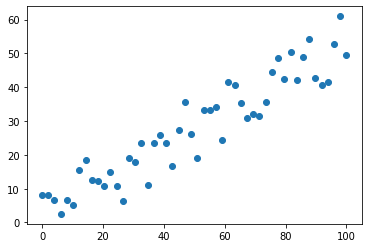

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Let's create a some randon data using linspace
x = np.linspace(0, 100, 50) # creates a range of 50 numbers evenly spaced between 0 and 100
delta = np.random.uniform(-10, 10, x.size)
y = 0.5*x + 3 + delta

plt.scatter(x, y)

In [7]:
# Defining our learning rate
learning_rate = 0.0001

# defining our initial values of b and m
initial_b = 0
initial_m = 0

# Setting how many iterations we wish to run
num_iterations= 1000

print('Initial MSE:', cost_function(initial_m, initial_b, x, y))
[b, m] = gradient_descent(initial_b, initial_m, x, y, learning_rate, num_iterations)
print('b:', b)
print('m:', m)
print('MSE:', cost_function(m, b, x, y))

Initial MSE: 1020.0643027372429
MSE after 0 iterations: 137.11597906985153
MSE after 100 iterations: 31.811039120057732
MSE after 200 iterations: 31.77668107564469
MSE after 300 iterations: 31.74267513764078
MSE after 400 iterations: 31.709017697606495
MSE after 500 iterations: 31.675705184082226
MSE after 600 iterations: 31.64273406220923
MSE after 700 iterations: 31.61010083335443
MSE after 800 iterations: 31.577802034739374
MSE after 900 iterations: 31.545834239072622
b: 0.19010181051209335
m: 0.5389065726581237
MSE: 31.514508845414344


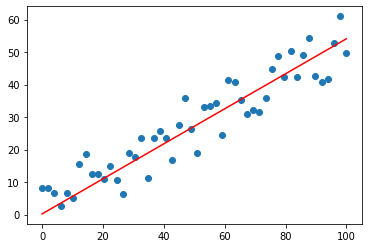

In [8]:
predictions = [(m * x[i]) + b for i in range(len(x))]
plt.scatter(x, y)
plt.plot(x, predictions, color='r')

# Let's use Sk Learn's Linear Regression model

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Let's change the shape of x array to the format expected by sklearn
print(x.shape)
x = x.reshape((-1, 1))
print(x.shape)

(50,)
(50, 1)


In [12]:
# Let's create the model object using LinearRegression
model = LinearRegression()

# Fit our model to our input data x and y
model.fit(x, y)

LinearRegression()

In [13]:
# Get our model paramters
print('Y Intercept:', model.intercept_) #b
print('Gradient:', model.coef_) #m

Y Intercept: 3.6346303889393354
Gradient: [0.48775663]


In [14]:
print('Y Intercept:', b)
print('Gradient:', m)

Y Intercept: 0.19010181051209335
Gradient: 0.5389065726581237


In [15]:
# Store all predictions in y_pred

y_pred = model.predict(x)

In [16]:
y

array([ 8.01364709,  8.09177576,  6.64958437,  2.53135652,  6.63233582,
        5.08638823, 15.47201153, 18.49026216, 12.43067462, 12.36751319,
       10.79393844, 14.86046202, 10.76183024,  6.38739417, 18.99849869,
       17.82180438, 23.44329795, 11.12682326, 23.47767197, 25.80320373,
       23.60143692, 16.76355345, 27.49238639, 35.71795335, 26.20218491,
       18.99404988, 33.17327997, 33.34746815, 34.30521121, 24.43793855,
       41.51970774, 40.69943436, 35.32539526, 30.79878219, 32.15298324,
       31.62628349, 35.71339196, 44.65023119, 48.76205709, 42.29963253,
       50.41028336, 42.18714241, 49.00915302, 54.22333085, 42.63849799,
       40.6327653 , 41.6643984 , 52.88041159, 61.00525601, 49.64802091])

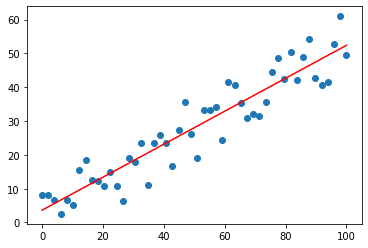

In [17]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')

In [20]:
from sklearn.metrics import mean_squared_error 

print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))

Mean squared error: 28.46


# Linear Regression on Olympic 100m Gold Times

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQTrYpw1FCRAqMEsZJRBr30sotdaZvia4NgQAWiJEuK13DAgnsZ)

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/olympic100m.csv"
df = pd.read_csv(file_name)
df.head(40)

,year,time
0,1896,12.00
1,1900,11.00
2,1904,11.00
3,1906,11.20
4,1908,10.80
5,1912,10.80
6,1920,10.80
7,1924,10.60
8,1928,10.80
9,1932,10.30


In [22]:
# Format data into correct shape
x = df['year']
x_train = np.array(x).reshape((-1, 1))
x_train.shape

(29, 1)

In [23]:
y_train = np.array(df['time'])

In [27]:
y_train.shape

(29,)

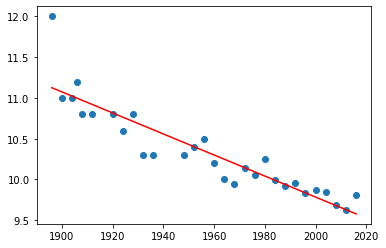

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Let's create the model object using LinearRegression
model = LinearRegression()

# Fit our model to our input data x and y
model.fit(x_train, y_train)

y_pred = model.predict(x_train)
plt.scatter(x_train, y_train)
plt.plot(x, y_pred, color='r')

In [29]:
# Predict for 2020 Olympics

x_2020 = np.array([2020]).reshape(-1, 1)
x_2020.shape

(1, 1)

In [30]:
model.predict(x_2020)

array([9.52679525])

# Polynomial Regressions

In [31]:
# Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Importing the dataset 
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/polylinearregression.csv"
df = pd.read_csv(file_name)
df.head(7)

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [34]:
# Extract our x values, the column Temperature
x = df.iloc[:, 1:2].values 

# Extract our y or target variable Pressure
y = df.iloc[:, 2].values 

In [35]:
x

array([[  0],
       [ 20],
       [ 40],
       [ 60],
       [ 80],
       [100]])

In [40]:
# Fitting Polynomial Regression to the dataset 
# Fitting the Polynomial Regression model on two components X and y.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
model_Poly = poly.fit_transform(x) 
  
lin_poly = LinearRegression() 
lin_poly.fit(model_Poly, y) 

LinearRegression()

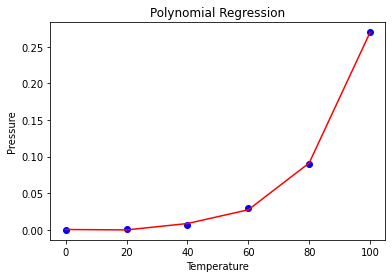

In [41]:
# Visualising the Polynomial Regression results 
plt.scatter(x, y, color = 'blue') 
  
plt.plot(x, lin_poly.predict(model_Poly), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
  
plt.show() 

# Multivariate Linear Regression

In [42]:
# Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Importing the dataset 
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/auto-mpg.csv"
auto_df = pd.read_csv(file_name)
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [43]:
# Check for the rows that contain "?"
auto_df[auto_df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [44]:
# Get the indexes that have "?" instead of numbers
indexNames = auto_df[auto_df['horsepower'] == "?" ].index
print(indexNames)
 
# Delete these row indexes from dataFrame
auto_df.drop(indexNames , inplace=True)

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')


In [45]:
# Just checking to see if they've been removed
auto_df[auto_df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [46]:
auto_df['horsepower'] = auto_df['horsepower'].astype(float)

In [47]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [49]:
x = auto_df.iloc[:,1:8].values
y = auto_df.iloc[:,0].values

In [50]:
x.shape

(392, 7)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=0)

regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [52]:
# cylinders	displacement	horsepower	weight	acceleration	model year	origin

# Data for Honda Prelude actual mpg is 24
Trial_Data = np.array([8, 220, 195, 3042 , 6.7, 98, 3])
Trial_Data = Trial_Data.reshape((-1, 7))
Trial_Data = Trial_Data.astype(float)

In [ ]:
regressor.predict(Trial_Data)[0]

37.86321409762151